In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pydataset import data
import seaborn as sns
from env import get_db_url

In [2]:
iris = data('iris')
sns.set_theme()

In [3]:
iris.head()


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


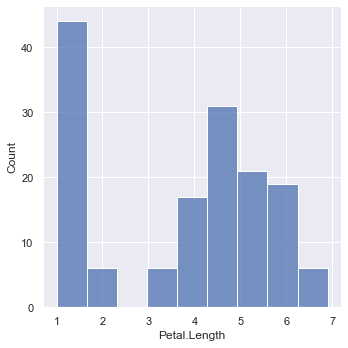

In [4]:
#1 Distribution of petal lengths
sns.displot(data=iris,x='Petal.Length')

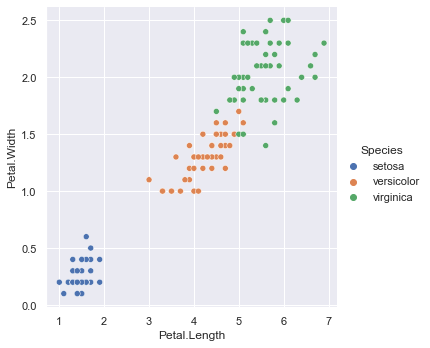

In [29]:
#2 correlation b/w petal length and width
sns.relplot(data=iris,x='Petal.Length',y='Petal.Width',hue='Species') #Yes

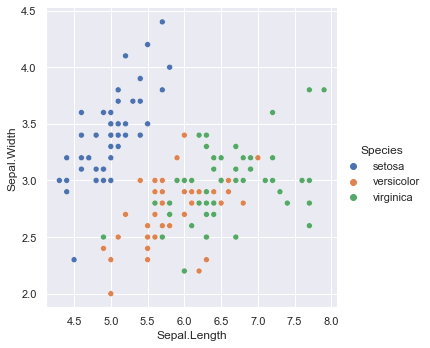

In [6]:
#3 Would it be reasonable to predict species based on sepal width and length?
sns.relplot(data = iris, x='Sepal.Length',y='Sepal.Width',hue='Species')
#Some clustering indicates the combination of these data points may be a 
# possible candidate for species prediction - at least for setosa
# **further analysis would be needed

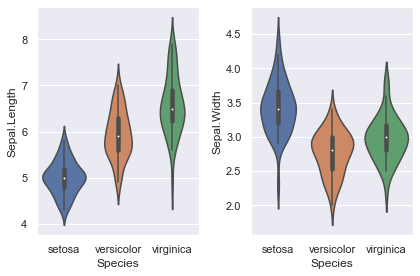

In [7]:
#3 alt - with cat 
plt.subplot(121)
sns.violinplot(data=iris,y='Sepal.Length',x='Species')
plt.subplot(122)
sns.violinplot(data=iris,y='Sepal.Width',x='Species')
plt.tight_layout()

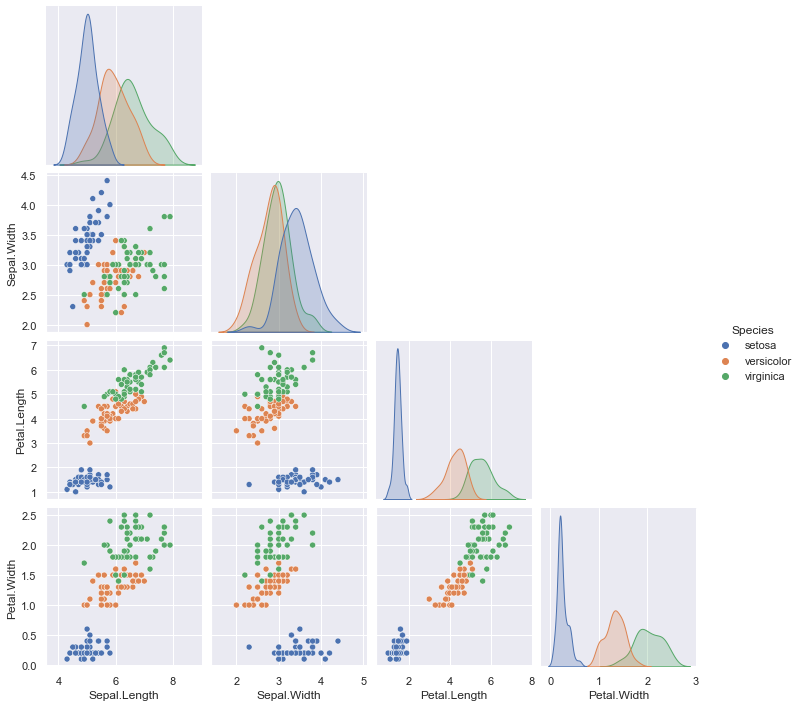

In [8]:
#4 which features would best predict species
sns.pairplot(data=iris,corner=True,hue='Species')
#quick glance at this indicates that petal length and width may be 
# best indicators of species
#if we combine two data points, most combos seem to be good predictions
#. --though the combo of sepal.width & sepal.length seem to be the worst

In [9]:
#4 alt:
# Try this with pd.melt & FacetGrid
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.melt.html
# https://stackoverflow.com/questions/59212378/how-do-i-get-the-diagonal-of-sns-pairplot

## Exercises Part II

In [10]:
#1 - load anscombe data set
anscombe = sns.load_dataset('anscombe')

In [11]:
anscombe.groupby(by='dataset').describe()
#mean and stddev are same for both x & y in all datasets

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

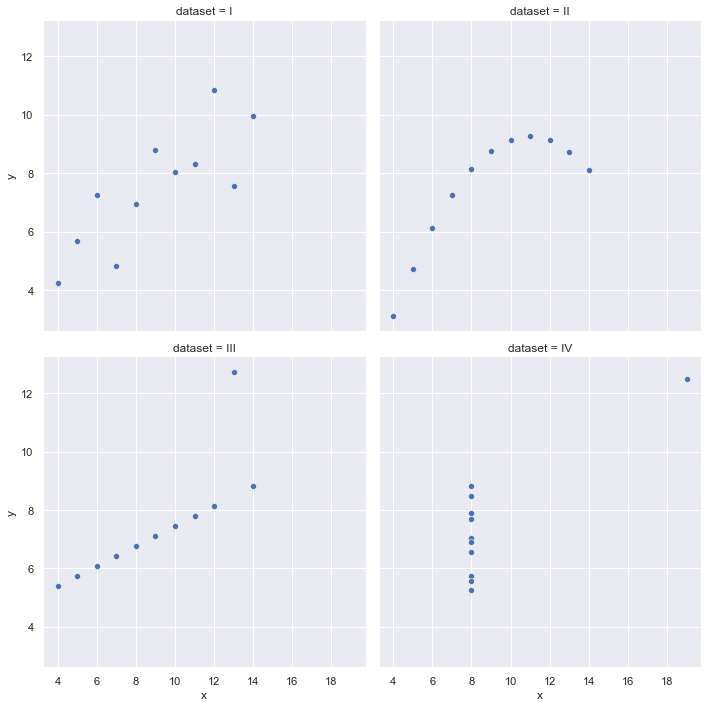

In [12]:
#1 - plot x&y, with dataset in separate columns
sns.relplot(data=anscombe,x='x',y='y',
            col='dataset',col_wrap=2)


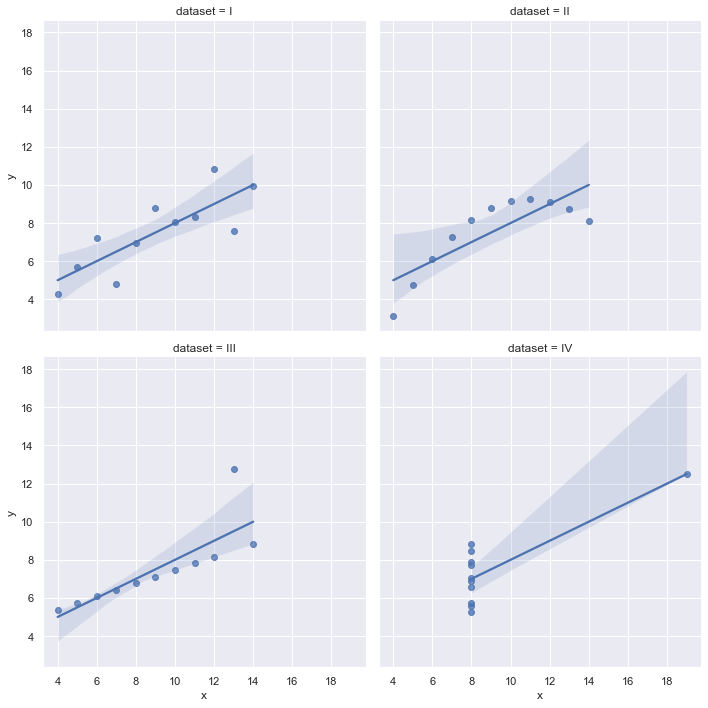

In [35]:
#1 v2 - effect of outliers seen with line:
sns.lmplot(data=anscombe,x='x',y='y',col = 'dataset', col_wrap=2)

In [13]:
#2 - insect spray
ins_sp = data('InsectSprays')
data('InsectSprays',show_doc=True)

InsectSprays

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Effectiveness of Insect Sprays

### Description

The counts of insects in agricultural experimental units treated with
different insecticides.

### Usage

    InsectSprays

### Format

A data frame with 72 observations on 2 variables.

[,1]

count

numeric

Insect count

[,2]

spray

factor

The type of spray

### Source

Beall, G., (1942) The Transformation of data from entomological field
experiments, _Biometrika_, **29**, 243–262.

### References

McNeil, D. (1977) _Interactive Data Analysis_. New York: Wiley.

### Examples

    require(stats); require(graphics)
    boxplot(count ~ spray, data = InsectSprays,
            xlab = "Type of spray", ylab = "Insect count",
            main = "InsectSprays data", varwidth = TRUE, col = "lightgray")
    fm1 <- aov(count ~ spray, data = InsectSprays)
    summary(fm1)
    opar <- par(mfrow = c(2, 2), oma = c(0, 0, 1.1, 0))
    plot(fm1)
 

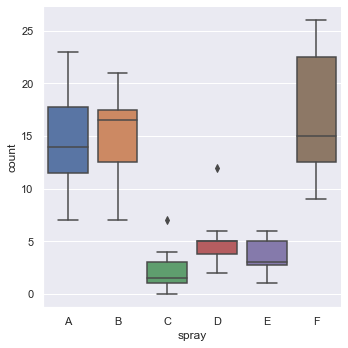

In [37]:
#2 boxplot
sns.catplot(data=ins_sp,x='spray',y='count',kind='box')

In [15]:
#3 - Swiss dataset
swiss=data('swiss')
swiss.head()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Courtelary,80.2,17.0,15,12,9.96,22.2
Delemont,83.1,45.1,6,9,84.84,22.2
Franches-Mnt,92.5,39.7,5,5,93.40,20.2
Moutier,85.8,36.5,12,7,33.77,20.3
Neuveville,76.9,43.5,17,15,5.16,20.6


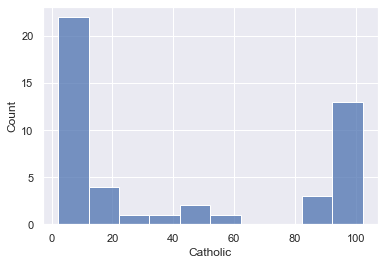

In [16]:
#3 - create is_Catholic datapoint - chose 50% cutoff point
sns.histplot(data=swiss,x='Catholic',binwidth=10)
#quick glance at distribution >> 70% is a good break point
swiss['is_catholic']=swiss.Catholic > 70

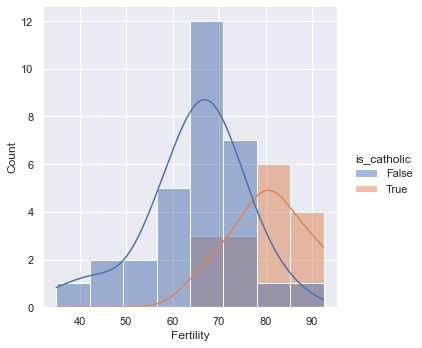

In [17]:
#3 - catholicism and fertility
sns.displot(data=swiss,x='Fertility',hue='is_catholic',kde=True)
#If we look at our arbitrary cutoff, then maybe


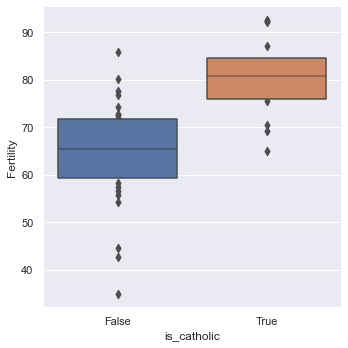

In [40]:
#3 alt - using cat plot
sns.catplot(data=swiss,x='is_catholic',y='Fertility',kind='boxen')

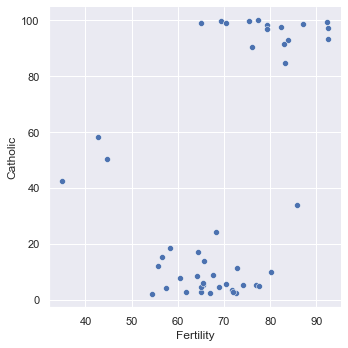

In [18]:
#3-2 - but, we look at the original data >> and I'm skeptical:

sns.relplot(data=swiss,x='Fertility',y='Catholic')


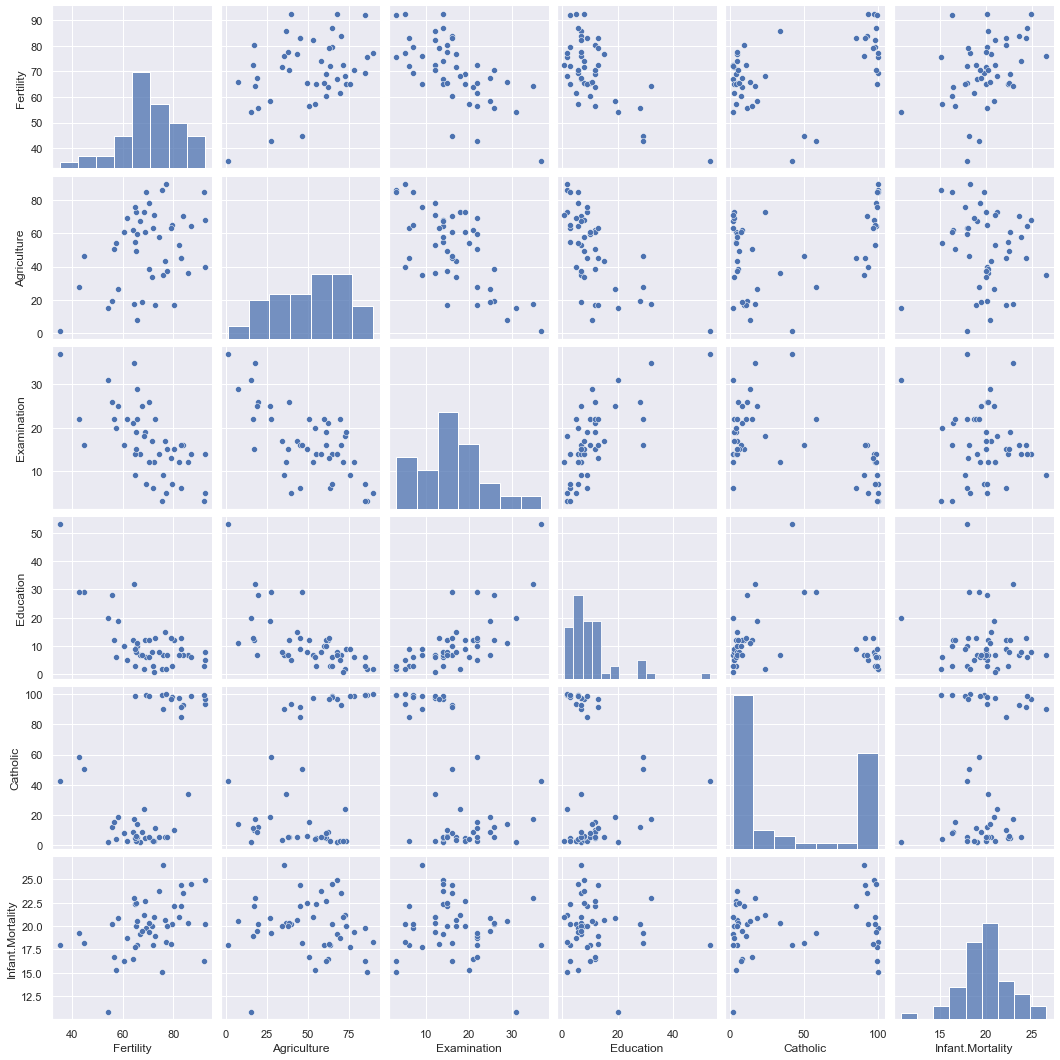

In [19]:
#3 what measure correlates with fertility most strongly?
sns.pairplot(data=swiss.iloc[:,:6]) #cool way to use iloc to ignore the column I added
#kinda looks like education and maybe examination to me

<AxesSubplot:>

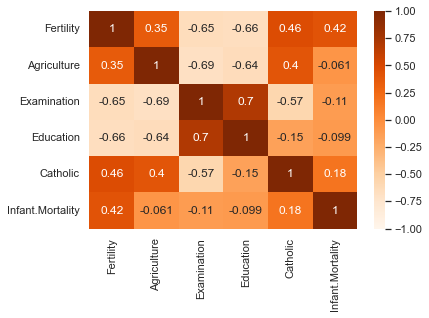

In [20]:
#v2 - But why guess correlation when you can get the value?
sns.heatmap(swiss.iloc[:,:6].corr(),cmap='Oranges',vmin=-1,center=0,annot=True)

In [21]:
#4 - chipo
#get DB
chipo = pd.read_sql('SELECT * FROM orders',get_db_url('chipotle'))
#update item price column
chipo.item_price = chipo.item_price.str.replace('$','',regex=False).astype(float)


In [22]:
# Bar w/ 4 most populat items and show revenue
#group by item and get total revenue and quantity, then pull 3 with highest quantity
df = chipo.groupby(['item_name'],as_index=False).agg({'item_price':'sum','quantity':'sum'}).nlargest(columns='quantity',n=4)
# chipo.head()

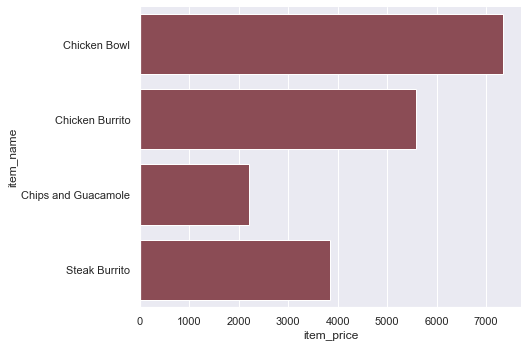

In [43]:
# sns.catplot(data=df,x=df.index,y='item_price',kind='bar')
#^^This threw an error related to the x labels. 
#Fixed by new groupby creating df w/o using group as index


sns.catplot(data=df,y='item_name',x='item_price',
            kind='bar',
            orient='h',
            aspect=1.5,
           color = '#95424e')

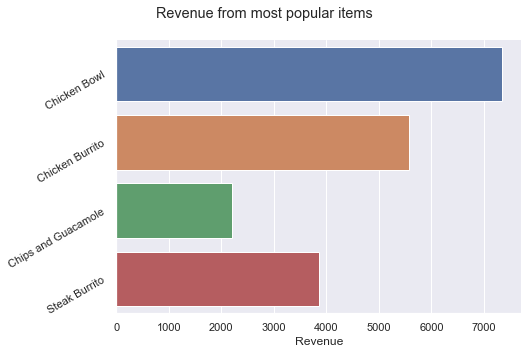

In [24]:
#now do the same, but pretty it up a bit
g = sns.catplot(data=df,y='item_name',x='item_price',
            kind='bar',
            orient='h',
            aspect=1.5)
type(g) #seaborn FacetGrid
g.set_axis_labels("Revenue","")
g.figure.suptitle("Revenue from most popular items")
g.set_yticklabels(rotation=30)
g.tight_layout()
#Not bad, but long y labels create off-center title

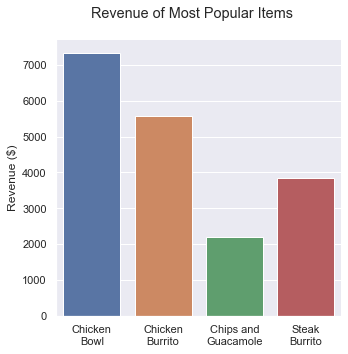

In [25]:
import textwrap
g = sns.catplot(data=df,x='item_name',y='item_price',
            kind='bar')
# type(g) #seaborn FacetGrid
g.set_axis_labels("","Revenue ($)")
g.figure.suptitle("Revenue of Most Popular Items", x=.55)
g.set_xticklabels([textwrap.fill(val,10) for val in df.item_name])
g.tight_layout()

#better - handling of item_name labels
#slightly better title, thought still manually adjusted off center of .5

In [26]:
#5 - sleepstudy
slp = data('sleepstudy')

In [28]:
slp.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 1 to 180
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Reaction  180 non-null    float64
 1   Days      180 non-null    int64  
 2   Subject   180 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 5.6 KB


<AxesSubplot:xlabel='Days', ylabel='Reaction'>

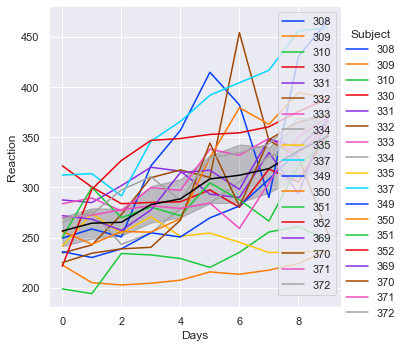

In [57]:
sns.relplot(data=slp,x='Days',y='Reaction',hue='Subject',palette='bright',kind='line')
sns.lineplot(data=slp,x='Days',y='Reaction',color='black')